# **Customer Churn Prediction**
<h2>Here we are working on a customer churn prediction data set and we are making a neural network or we can say a ANN model


In [54]:
# importing the libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# loading data set downloaded from kaggel
df = pd.read_csv("/content/Churn_Modelling.csv")

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
# Checking for the null values so we can clean the data before proceding
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [5]:
# Checking for duplicates so we can remove it
df.duplicated().sum()

np.int64(0)

<h2> The last col is Exited that tells us that whether the customer has left or not so we are making sure this col does not have any value other then 0 and 1</h2>

In [6]:
df['Exited'].value_counts()

,count
Exited,
0,7963
1,2037


<h2> The Geography col contaimn the name of countries from where different customers are so we are looking at there count and country </h2>
<h2>Similarly in case of gender </h2>

In [7]:
df['Geography'].value_counts()

,count
Geography,
France,5014
Germany,2509
Spain,2477


In [8]:
df['Gender'].value_counts()

,count
Gender,
Male,5457
Female,4543


<h2> We are looking at the data set to make such a model which tells us that which customer is going to leave us in future so first three col does not sound to have any relation with that so we are droping those col <h2>

In [9]:
df.drop(columns=['RowNumber','CustomerId','Surname'], inplace = True)

In [10]:
df.head(2)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0


<h3> As our data set is not numerical due to geography and gender col so we are converting it to neumericval by using numerical values.

In [11]:
df = pd.get_dummies(df, columns=['Geography', 'Gender'], drop_first=True).astype(int)


<h3> We are storing the last col or output col in y  and rest of data in X. Later on we are using sklearn to split the data between training and testing data so we can get a model accuracy to know how good is our model

In [12]:
# train test split
X = df.drop(columns=['Exited'])
y = df['Exited']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 1)


In [13]:
X

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0,1,1,1,101348,0,0,0
1,608,41,1,83807,1,0,1,112542,0,1,0
2,502,42,8,159660,3,1,0,113931,0,0,0
3,699,39,1,0,2,0,0,93826,0,0,0
4,850,43,2,125510,1,1,1,79084,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0,2,1,0,96270,0,0,1
9996,516,35,10,57369,1,1,1,101699,0,0,1
9997,709,36,7,0,1,0,1,42085,0,0,0
9998,772,42,3,75075,2,1,0,92888,1,0,1


In [14]:
X_train.shape

(8000, 11)

In [15]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0,1,1,1,101348,1,0,0,0
1,608,41,1,83807,1,0,1,112542,0,0,1,0
2,502,42,8,159660,3,1,0,113931,1,0,0,0
3,699,39,1,0,2,0,0,93826,0,0,0,0
4,850,43,2,125510,1,1,1,79084,0,0,1,0


<h3> Our dat aset contains very small value and very large values and it is difficult for the model to converge so we are rescalling the values.

In [16]:
# Scaling the values
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)


In [17]:
X_train_scaled

array([[-0.23082038, -0.94449979, -0.70174202, ...,  1.71490137,
        -0.57273139,  0.91509065],
       [-0.25150912, -0.94449979, -0.35520275, ..., -0.58312392,
        -0.57273139, -1.09278791],
       [-0.3963303 ,  0.77498705,  0.33787579, ...,  1.71490137,
        -0.57273139, -1.09278791],
       ...,
       [ 0.22433188,  0.58393295,  1.3774936 , ..., -0.58312392,
        -0.57273139, -1.09278791],
       [ 0.13123255,  0.01077067,  1.03095433, ..., -0.58312392,
        -0.57273139, -1.09278791],
       [ 1.1656695 ,  0.29735181,  0.33787579, ...,  1.71490137,
        -0.57273139,  0.91509065]])

In [53]:
#  importing libraries , model and hidden layers to make a neural network
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense


<h1> This part of code give us the structure of our neural network</h1>
<h3> As the 2nd and 3rd line shows there are two hidden layers with 11 nodes/biases and line 4 shows a last layer with one node and activation function sigmoid as sigmoid gives probability between 0 and 1 so we can say output is one if the probability is >= 0.5</h3>

In [38]:
model = Sequential()
model.add(Dense(11,activation = 'relu' , input_dim = 11))
model.add(Dense(11,activation = 'relu' ))
model.add(Dense(1,activation = 'sigmoid'))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [39]:
# it tells us how many values of weights and biases in total are being calculated in a particular layer
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 11)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 11)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            12 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 276 (1.08 KB)

 Trainable params: 276 (1.08 KB)

 Non-trainable params: 0 (0.00 B)

In [40]:
# adding a optimizer and loss function
model.compile(loss = 'binary_crossentropy' , optimizer = 'Adam', metrics = ['accuracy'])

In [45]:
# Training the model
history =  model.fit(X_train_scaled,y_train, epochs = 100,validation_split = 0.2)

Epoch 1/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6874 - loss: 0.5966 - val_accuracy: 0.8031 - val_loss: 0.4660
Epoch 2/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8010 - loss: 0.4563 - val_accuracy: 0.8081 - val_loss: 0.4373
Epoch 3/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8129 - loss: 0.4404 - val_accuracy: 0.8138 - val_loss: 0.4276
Epoch 4/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8191 - loss: 0.4156 - val_accuracy: 0.8206 - val_loss: 0.4208
Epoch 5/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8225 - loss: 0.4157 - val_accuracy: 0.8188 - val_loss: 0.4128
Epoch 6/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8296 - loss: 0.4004 - val_accuracy: 0.8194 - val_loss: 0.4061
Epoch 7/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8374 - loss: 0.3901 - val_accuracy: 0.8231 - val_loss: 0.3997
Epoch 8/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8300 - loss: 0.4042 - val_accu

<h2> the graphs between (loss and val_loss) and (accuracy and val_accuracy) can help us visualize that whether there is a over fitting or not

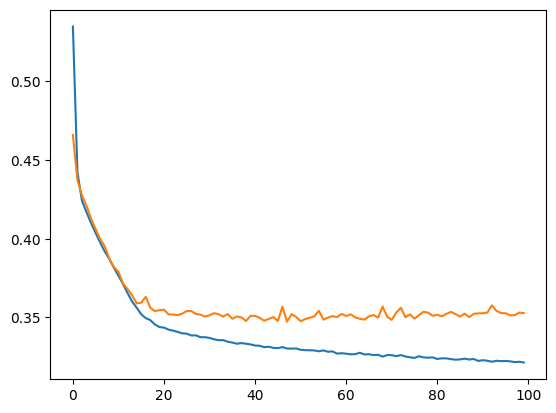

In [55]:
#  We are ploting a graph so that we can visualize the over fitting
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')

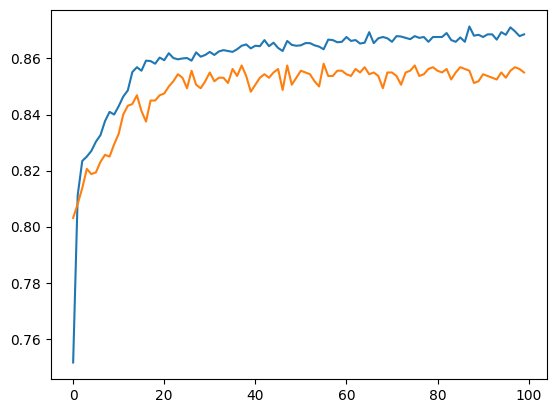

In [48]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

In [49]:
model.layers[1].get_weights()

[array([[ 0.32637045, -0.38716233,  0.07484839, -0.68691033,  0.40102577,
          0.39040962,  0.5357644 , -0.09225591,  0.2343726 , -0.51614416,
         -0.6591284 ],
        [ 0.37198046, -0.24104092, -0.6232866 ,  0.40498453, -0.2509697 ,
          0.14706087,  0.02008509,  0.56138337,  0.19462737, -0.04101552,
         -0.29423583],
        [ 0.5774974 , -0.79616797,  0.31420168,  0.25808868,  0.37767994,
          0.12484347,  0.20152918, -0.001255  ,  0.5407034 ,  0.8019804 ,
          0.05002393],
        [-0.3915941 ,  0.5640404 , -0.97926474, -0.8164332 ,  0.22820243,
          0.43386757, -0.06052321,  0.5548484 , -0.84828174,  0.43398586,
         -0.08264516],
        [ 0.1873998 ,  0.17586543, -0.18623477,  0.04663278,  0.5415139 ,
          0.5507759 , -0.47146252,  0.49954405,  0.6250638 ,  0.34283936,
          0.26950768],
        [ 0.19908607, -0.21762353, -0.10050262,  0.7424283 , -0.27348557,
         -0.4107498 , -0.50988716, -0.17167549,  0.16595899, -0.8828842

In [50]:
y_log = model.predict(X_test_scaled)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  


if sigmoid function gives probability greater then or equal to 0.5 then we can say that the output is 1 else output is 0

In [63]:
y_pred = np.where(y_log>=0.5,1,0)

In [65]:
# getting the accuracy of our model
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.858